In [13]:
import sys

sys.path.append('..')
from imports.ExtractContactCases import ExtractContactCases
from imports.EventArrayAugmention import *
import math
import numpy as np

ex = ExtractContactCases(outdir='../../data/small/contact_extraction7/', 
                         possible_angles=[math.radians(9)], 
                         N_examples=5,
                         theta=[0, 0, np.pi/6, np.pi/3, np.pi/2],
                         bag_file_name='/home/hussain/catkin_ws/small_example4_heavy_one_phi_4thetas.bag',
                         center=(180, 117),
                         circle_rad=85,
                         n_init_events=10000,
                         delta_t=0.075e9,
                         margin=-0.025e9,
                         event_array_augmentations=[
                             #RotateEvents(90),
                             RotateEvents(180)
                             #JitterEvents(2)
                         ]
                        )

In [14]:
ex.extract()

parsing bag:   0%|          | 0/36449 [00:00<?, ?msg/s]

extracting contact timestamps:   0%|          | 0/13491 [00:00<?, ?it/s]

extracting event arrays:   0%|          | 0/60 [00:00<?, ?it/s]

saving
1
2
1
1


In [15]:
train = ex.load_train()

In [16]:
len(train)

90

In [17]:
len(ex.load())

60

<AxesSubplot: >

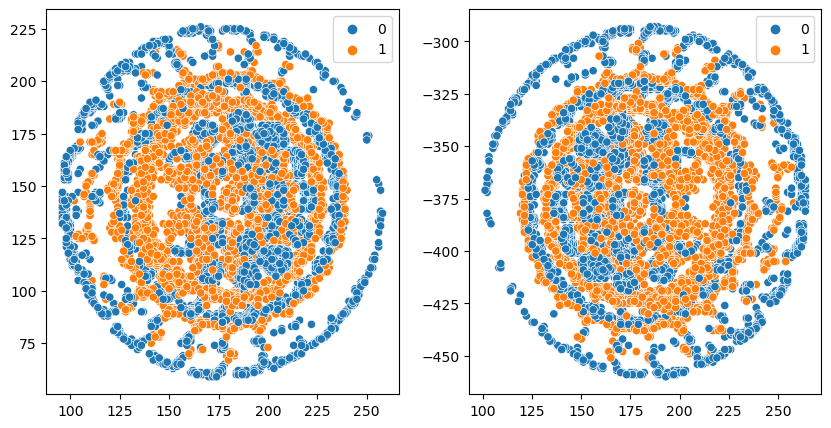

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
i=8
ev_arr = np.array(train[f'sample_{i}']['events'])
aug_arr = np.array(train[f'sample_{i+45}']['events'])
fig, axes = plt.subplots(1, 2, figsize=(2*5, 1*5))
plt.sca(axes[0])
sns.scatterplot(x=ev_arr[:, 0], y=260-ev_arr[:, 1], hue=ev_arr[:, 3])
plt.sca(axes[1])
sns.scatterplot(x=aug_arr[:, 0], y=260-aug_arr[:, 1], hue=aug_arr[:, 3])

In [ ]:
train[f'sample_{i}']['events']

In [11]:
ev_arr.shape, aug_arr.shape

((9825, 4), (9825, 4))

In [ ]:
len({yo:10 for yo in range(100)})

In [ ]:
samples = ex.load()

In [ ]:
def rotate_case(ev_arr, label, angle):
    ev_arr = np.array(ev_arr)
    theta = np.radians(angle)
    c, s = np.cos(theta), np.sin(theta)
    R = np.array(((c, -s), (s, c)))
    
    centered = ev_arr[:, :2] - np.array([157, 124])
    centered[:, 1] = 260 - centered[:, 1]
    rot_ev = (R @ centered.T).T 
    rot_ev[:, 1] = 260 - rot_ev[:, 1]
    rot_ev += np.array([157, 124])

    
    rot_v = np.array(ex.cases_dict[label])
    new_rot_v = R @ rot_v
    print(new_rot_v, ex.cases_dict[label])

    best_rot_diff = 100
    best_rot_idx = 1
    i = 1
    
    for rot in ex.list_of_rotations:
        diff_vals = np.sqrt( np.power(rot[0] - new_rot_v[0], 2) +  np.power(rot[1] - new_rot_v[1], 2))
        if best_rot_diff > diff_vals:
            best_rot_diff = diff_vals
            best_rot_idx = i
        i = i + 1
    return best_rot_idx, np.concatenate([rot_ev.astype(int), ev_arr[:, 2:]], -1)

In [ ]:
s_idx = 'sample_25'
ev_arr = np.array(samples[s_idx]['events'])
case = samples[s_idx]['case']
rot_case, rot = rotate_case(ev_arr, case, 90)
case, rot_case

In [ ]:
ex.cases_dict[case]

In [ ]:
cases_dict

In [ ]:
import seaborn as sns
fig, axes = plt.subplots(1, 2, figsize=(2*5, 1*5))
plt.sca(axes[0])
sns.scatterplot(x=ev_arr[:, 0], y=260-ev_arr[:, 1], hue=ev_arr[:, 3])
plt.sca(axes[1])
sns.scatterplot(x=rot[:, 0], y=260-rot[:, 1], hue=rot[:, 3])

In [ ]:
rx, ry=cases_dict[case]

In [ ]:
phi = np.sqrt(rx**2+ry**2)
phi

In [ ]:
theta = np.arctan2(ry, rx)
theta

In [ ]:
rot_theta = theta + np.pi / 6
phi*np.cos(rot_theta), phi*np.sin(rot_theta)

In [ ]:
np.degrees(0.5235987755982987)

In [ ]:
rot_case

In [ ]:
import seaborn as sns
fig, axes = plt.subplots(5, 12, figsize=(12*5, 5*5))
plt.tight_layout()
for i, (ev_arr, ax) in enumerate(zip(event_arrays, axes.ravel())):
    plt.sca(ax)
    sns.scatterplot(x=ev_arr[:, 0], y=260-ev_arr[:, 1], hue=ev_arr[:, 3])
    plt.title(str(cases_dict[label_contact_case[i]]))

    
#plt.savefig('25ms_b4_75ms_after.png')
